In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jarredgaudineer/social-media-posts-fortune-1000-companies")

# print("Path to dataset files:", path)

In [ ]:
# import os

# # Using the 'path' variable from your previous code
# downloaded_files = os.listdir(path)

# print("Downloaded files:", downloaded_files)

In [ ]:
# combine path with the file name
# path = os.path.join(path, downloaded_files[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the file path within your Drive
path = '/Users/hiamrob/Downloads/archive (1)/10Mar2025.json'

# # Save the data as a JSON file
# with open(path, 'w') as f:
#     json.dump(data, f)

# print(f"Data saved to: {path}")

In [ ]:
import json

with open(path, 'r') as f:
    data = json.load(f)

In [ ]:
data[0].keys()

dict_keys(['company', 'rank', 'timestamp', 'tweets', 'posts', 'comments', 'metadata'])

In [ ]:
# attributes of interest
atts = ["tweets", "comments", "posts"]
text_data = {}


for company in data:
  company_name = company["company"]
  text_data[company_name] = []

  for att in atts:
    if att in company:
      for att_item in company[att]:
        text_data[company_name].append(att_item["text"])

In [ ]:
# attributes of interest
atts = ["tweets", "comments", "posts"]
text_data = {}

for company in data:
    company_name = company["company"]
    text_data[company_name] = []
    count = 0

    # scorri ogni tipo di attributo fino a 100 testi
    for att in atts:
        if att in company:
            for att_item in company[att]:
                #if count >= 100:
                    #break
                text_data[company_name].append(att_item["text"])
                #count += 1
        #if count >= 100:
            #break

# Alla fine `text_data[company_name]` contiene al massimo 100 testi

text_data has been created for further analysis. items are either comments, reddit posts or tweets.

## Preprocessing the texts

### Emojis to text

In [ ]:
import emoji

def demojize_text(text):
    return emoji.demojize(text, delimiters=(' ', ' '))

In [ ]:
demojised_text_data_1 = {}

for company in text_data:
  demojised_text_data_1[company] = []

  for text in text_data[company]:
    demojised_text = demojize_text(text)
    demojised_text_data_1[company].append(demojised_text)


### Lower case

In [ ]:
lowercased_text_data_2 = {}

for company in demojised_text_data_1:
  lowercased_text_data_2[company] = []

  for text in demojised_text_data_1[company]:
    lowercased_text = text.lower()
    lowercased_text_data_2[company].append(lowercased_text)

### Remove links, hashtags, mentions

In [ ]:
import re

In [ ]:
linkMentionRemoved_text_data_3 = {}

for company in lowercased_text_data_2:
  linkMentionRemoved_text_data_3[company] = []

  for text in lowercased_text_data_2[company]:
    # remove links
    # Remove URLs and mentions
    temp_text = re.sub(r"http\S+|www\S+|@\w+|#\w+", '', text)
    linkMentionRemoved_text_data_3[company].append(temp_text)

### Remove neutral punctuation and numbers

In [ ]:
import string
import unicodedata
import emoji
import nltk

def further_preprocess(text: str) -> str:
    # unicode normalization
    text = unicodedata.normalize('NFKC', text)
    # remove numbers
    text = re.sub(r'\d+', ' ', text)

    # —————————————————————————————
    # uniform different types of quotes
    text = re.sub(r"[‘’´`“”„‟‚‛]", "'", text)

    # remove "neutral" punctuation
    #    (quindi parentesi, virgole, punti, punti e virgola, virgolette, ecc.)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # —————————————————————————————

    # trim extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# --- Esempio di utilizzo su text_data già popolato ---
cleaned_4 = {comp: [further_preprocess(t) for t in texts]
           for comp, texts in text_data.items()}

### Empty Strings

In [ ]:
nonEmpty_text_data_5 = {}

for company in cleaned_4:
  nonEmpty_text_data_5[company] = []
  for text in cleaned_4[company]:
    if text != "":
      nonEmpty_text_data_5[company].append(text)

In [ ]:
len(nonEmpty_text_data_5["Walmart"])

5113

### remove non english text

In [ ]:
from pandas import Series

In [ ]:
%%capture
!pip install langdetect
!pip install nltk

In [ ]:
nonEmpty_text_data_5["Dropbox"][7]

'Heres a list of stocks with positive earnings growth annual revenue of at least billion a forward PE ratio below a market cap below billion and gross margin of at least BOX Box Inc FIVN Five Inc CRUS Cirrus Logic Inc DBX Dropbox Inc SLM SLM Corporation Sallie Mae BGC BGC Partners Inc PIPR Piper Sandler Companies ANF Abercrombie Fitch Co HALO Halozyme Therapeutics Inc NWE NorthWestern Energy Group Well keep bringing you unique thoughtprovoking lists like this to spark research and new opportunities Stay tuned'

In [ ]:
from langdetect import detect

nonEng = []  # raccolta di (company, idx) per i testi non-inglesi
errors = []  # raccolta di (company, idx, exception) per i testi problematici
onlyEnglish_text_data_6 = {}

for company, texts in nonEmpty_text_data_5.items():
    onlyEnglish_text_data_6[company] = []

    for idx, text in enumerate(texts):
        try:
            if detect(text) == "en":
                # solo gli inglesi finiscono qui
                onlyEnglish_text_data_6[company].append(text)
            else:
                # testi non-en vengono scartati
                nonEng.append((company, idx))

        except Exception as e:
            # testi problematici vengono anch’essi scartati
            errors.append((company, idx, str(e)))
            print(f"[{company}] Error detecting language at index {idx}: {e}")
            print(f"[{company}] Problematic text (len {len(text)}): {text[:100]}…")

# Report finale
print("\n=== Testi NON inglesi scartati ===")
for comp, i in nonEng:
    print(f"  • {comp}  idx={i}")

print("\n=== Testi con ERRORE di rilevamento ===")
for comp, i, err in errors:
    print(f"  • {comp}  idx={i}  errore: {err}")

[Walmart] Error detecting language at index 3935: No features in text.
[Walmart] Problematic text (len 10): 🤡🤡🤡🤡🤡🤡🤡🤡🤡🤡…
[Wells Fargo] Error detecting language at index 580: No features in text.
[Wells Fargo] Problematic text (len 2): ✅✅…
[Humana] Error detecting language at index 436: No features in text.
[Humana] Problematic text (len 1): 😅…
[Tesla] Error detecting language at index 21: No features in text.
[Tesla] Problematic text (len 197): The Rules EMOJI style ️⃣ 🤫🚫💬 TSLA 👨‍💼👩‍💼👫👪 ️⃣ 🤐🚫💬 TSLA 👨‍💼👩‍💼👫👪🤦 ️⃣ ⚠️💰📉 🛑🤦‍♂️ 💸🌀 TSLA ️⃣ ⚠️🤩📈❌ 😱📉❌ …
[Tesla] Error detecting language at index 6115: No features in text.
[Tesla] Problematic text (len 2): 🎵🤘…
[Dell Technologies] Error detecting language at index 666: No features in text.
[Dell Technologies] Problematic text (len 3): 👡👠🩴…
[Boeing] Error detecting language at index 1829: No features in text.
[Boeing] Problematic text (len 4): ️️️️…
[IBM] Error detecting language at index 1604: No features in text.
[IBM] Problematic text (len 5): 🚀🚀

In [ ]:
print(len(nonEng))
print(len(onlyEnglish_text_data_6))

54115
963


### Wrap up pre-processing

In [ ]:
preprocessed_text_data = onlyEnglish_text_data_6

initial_len = 0
for i in text_data:
  initial_len += len(text_data[i])

final_len = 0
for i in preprocessed_text_data:
  final_len += len(preprocessed_text_data[i])

print(f"initally, {initial_len} number of text instances were in the dataset, post pre-processing it has become: {final_len}")

initally, 591347 number of text instances were in the dataset, post pre-processing it has become: 460433


In [ ]:
import json

# Supponendo che preprocessed_text_data sia già definito
with open("text_data.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_text_data, f, ensure_ascii=False, indent=4)

## Dataset exploration

### Text length distribution

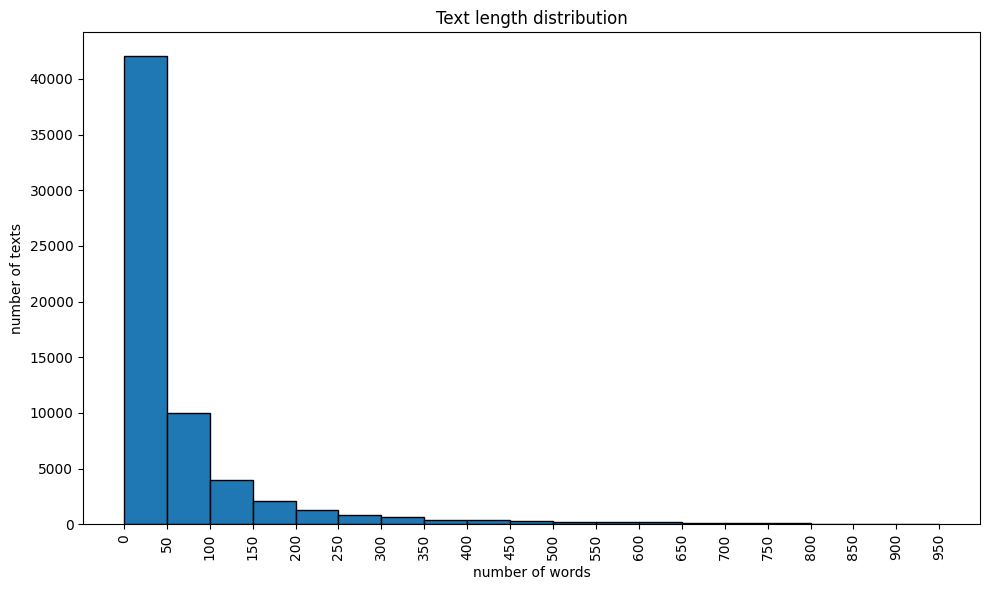

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcola tutte le lunghezze
all_texts = [txt for texts in text_data.values() for txt in texts]
lengths = [len(txt.split()) for txt in all_texts]

# Definisci i bin: da 0 fino a max(lengths), step=5 parole
max_len = max(lengths)
bins = np.arange(0, 1000, 50)

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=bins, edgecolor='black')
plt.title("Text length distribution")
plt.xlabel("number of words")
plt.ylabel("number of texts")
plt.xticks(bins, rotation=90)  # mostra tutte le tacche ogni 5 parole
plt.tight_layout()
plt.show()


### Stopwords

In [ ]:
from nltk.corpus import stopwords
# --- 2) Parole più frequenti ---

# Stopword in inglese
stop = set(stopwords.words('english'))

# Tokenizzazione semplice e filtraggio
tokens = [
    word.lower()
    for txt in all_texts
    for word in txt.split()
    if word.isalpha() and word.lower() not in stop
]

# Frequenze
freq = Counter(tokens)
top20 = freq.most_common(40)

# Creazione DataFrame e stampa
df_top20 = pd.DataFrame(top20, columns=["word", "count"])
print("Top 20 parole più frequenti:")
print(df_top20.to_string(index=False))

Top 20 parole più frequenti:
   word  count
   like  16831
   exam  12827
  would  12335
    one  11860
    get  11237
     de  10107
   also   9738
    new   8569
 market   8019
  could   7556
   time   7206
   even   7145
   take   6292
    see   6195
   know   6178
   make   6063
  think   5970
 people   5884
   back   5826
   good   5657
company   5494
  first   5396
  still   5385
 really   5355
   want   5289
   much   5266
    use   5224
    que   5154
     go   4965
   need   4957
  going   4645
     us   4620
    got   4451
  price   4266
someone   4263
    way   4220
     la   4081
   best   3973
    two   3953
    may   3913


## Big Five

### Model 1

In [ ]:
!pip install idna

In [ ]:
#!/usr/bin/env python3
# ocean_by_company.py

import json
import torch
import numpy as np
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm.auto import tqdm
import torch.nn.functional as F

# ====== Configurazione dispositivo MPS (macOS) o CPU fallback ======
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# ====== Modello fine-tuned Big Five ======
MODEL_NAME = "KevSun/Personality_LM"

# Carica tokenizer e modello, sposta su MPS/CPU
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    ignore_mismatched_sizes=True  # ignora i weight extra/mancanti nella head
).to(device)
model.eval()

# Mapping etichetta → indice nell’ordine O, C, E, A, N
label2idx = {
    "openness": 0,
    "conscientiousness": 1,
    "extraversion": 2,
    "agreeableness": 3,
    "neuroticism": 4,
}

def tweet_scores(tweets, batch_size=32, max_length=64):
    """
    tweets: list di stringhe
    ritorna: lista di vettori numpy shape (5,) con i punteggi softmax
    """
    all_scores = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i : i + batch_size]
        enc = tokenizer(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)
        with torch.no_grad():
            logits = model(**enc).logits  # (batch_size, 5)
            probs  = F.softmax(logits, dim=-1).cpu().numpy()
        all_scores.extend(probs)
    return all_scores

def company_ocean(data_dict, weight_fn=None):
    """
    data_dict: dict[str, list] → {azienda: [tweet1, tweet2, ...]}
    weight_fn: funzione(tweet_obj)->float oppure None
    ritorna: pandas.DataFrame con media OCEAN per azienda
    """
    results = {}
    for company, tweets in tqdm(data_dict.items(), desc="Calcolo per azienda"):
        if not tweets:
            continue
        vecs = np.array(tweet_scores(tweets))  # shape (n_tweets, 5)
        if weight_fn is None:
            mean_vec = vecs.mean(axis=0)
        else:
            weights = np.array([weight_fn(t) for t in tweets], dtype=float)
            mean_vec = np.average(vecs, axis=0, weights=weights)
        results[company] = mean_vec

    df = pd.DataFrame.from_dict(
        results, orient="index",
        columns=["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    )
    return df

if __name__ == "__main__":
    # Carica il tuo dizionario (es. da JSON)

    # Esempio di funzione di peso per likes (se i tweet sono dict)
    # def weight_by_likes(t):
    #     return 1 + t.get("likes", 0)

    # Calcola il DataFrame (senza ponderazione)
    df_ocean = company_ocean(text_data)

    # Oppure con ponderazione per likes:
    # df_ocean = company_ocean(data, weight_fn=weight_by_likes)

    # Salva e stampa
    df_ocean.to_csv("ocean_by_company.csv", index=True)
    print(df_ocean.round(3))

Using device: mps


Some weights of the model checkpoint at KevSun/Personality_LM were not used when initializing RobertaForSequenceClassification: ['roberta.hidden_layer.bias', 'roberta.hidden_layer.weight', 'roberta.output_layer.bias', 'roberta.output_layer.weight', 'roberta.transformer.embeddings.LayerNorm.bias', 'roberta.transformer.embeddings.LayerNorm.weight', 'roberta.transformer.embeddings.position_embeddings.weight', 'roberta.transformer.embeddings.token_type_embeddings.weight', 'roberta.transformer.embeddings.word_embeddings.weight', 'roberta.transformer.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.transformer.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.transformer.encoder.layer.0.attention.output.dense.bias', 'roberta.transformer.encoder.layer.0.attention.output.dense.weight', 'roberta.transformer.encoder.layer.0.attention.self.key.bias', 'roberta.transformer.encoder.layer.0.attention.self.key.weight', 'roberta.transformer.encoder.layer.0.attention.self.query.bias

Calcolo per azienda:   0%|          | 0/963 [00:00<?, ?it/s]

                              Openness  Conscientiousness  Extraversion  \
Walmart                          0.228              0.194         0.189   
Amazon                           0.230              0.193         0.190   
Apple                            0.229              0.193         0.190   
UnitedHealth Group               0.226              0.192         0.194   
Berkshire Hathaway               0.227              0.193         0.194   
...                                ...                ...           ...   
Allegiant Travel                 0.231              0.197         0.190   
Dropbox                          0.223              0.192         0.194   
Exact Sciences                   0.227              0.195         0.190   
BWX Technologies                 0.227              0.196         0.191   
Clear Channel Outdoor Hldgs.     0.228              0.199         0.186   

                              Agreeableness  Neuroticism  
Walmart                               0.

In [ ]:
# install these packages before importing them (transformers, PyTorch)
# install these packages before importing them (transformers, PyTorch)
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
model = AutoModelForSequenceClassification.from_pretrained("KevSun/Personality_LM", ignore_mismatched_sizes=True)
tokenizer = AutoTokenizer.from_pretrained("KevSun/Personality_LM")

# Choose between direct text input or file input
use_file = False  # Set to True if you want to read from a file

if use_file:
    file_path = 'path/to/your/textfile.txt'  # Replace with your file path
    with open(file_path, 'r', encoding='utf-8') as file:
        new_text = file.read()
else:
    new_text = "I'm happy that walmart is producing something juicy"

# Encode the text using the same tokenizer used during training
encoded_input = tokenizer(new_text, return_tensors='pt', padding=True, truncation=True, max_length=64)

model.eval()  # Set the model to evaluation mode

# Perform the prediction
with torch.no_grad():
    outputs = model(**encoded_input)


predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_scores = predictions[0].tolist()


trait_names = ["agreeableness", "openness", "conscientiousness", "extraversion", "neuroticism"]


for trait, score in zip(trait_names, predicted_scores):
    print(f"{trait}: {score:.4f}")

##"output":
#agreeableness: 0.2138
#openness: 0.2890
#conscientiousness: 0.1921
#extraversion: 0.1307
#neuroticism: 0.1744


Some weights of the model checkpoint at KevSun/Personality_LM were not used when initializing RobertaForSequenceClassification: ['roberta.hidden_layer.bias', 'roberta.hidden_layer.weight', 'roberta.output_layer.bias', 'roberta.output_layer.weight', 'roberta.transformer.embeddings.LayerNorm.bias', 'roberta.transformer.embeddings.LayerNorm.weight', 'roberta.transformer.embeddings.position_embeddings.weight', 'roberta.transformer.embeddings.token_type_embeddings.weight', 'roberta.transformer.embeddings.word_embeddings.weight', 'roberta.transformer.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.transformer.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.transformer.encoder.layer.0.attention.output.dense.bias', 'roberta.transformer.encoder.layer.0.attention.output.dense.weight', 'roberta.transformer.encoder.layer.0.attention.self.key.bias', 'roberta.transformer.encoder.layer.0.attention.self.key.weight', 'roberta.transformer.encoder.layer.0.attention.self.query.bias

agreeableness: 0.1637
openness: 0.2465
conscientiousness: 0.1567
extraversion: 0.2049
neuroticism: 0.2283


### Model 2

In [ ]:
#!/usr/bin/env python3
# ocean_by_company.py

import warnings
warnings.filterwarnings('ignore')

import torch
import numpy as np
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm.auto import tqdm
import torch.nn.functional as F

# ====== Configurazione dispositivo MPS (macOS) o CPU fallback ======
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# ====== Modello fine-tuned Big Five ottimizzato out-of-the-box ======
MODEL_NAME = "Minej/bert-base-personality"

# Carica tokenizer e modello, sposta su MPS/CPU
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)
model.eval()

# L'output del modello ha logit nell'ordine:
# [Extroversion, Neuroticism, Agreeableness, Conscientiousness, Openness]
# Vogliamo riorganizzare in [Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism]
REORDER_IDX = [4, 3, 0, 2, 1]


def tweet_scores(tweets, batch_size=32, max_length=64):
    """
    tweets: list di stringhe
    ritorna: lista di vettori numpy shape (5,) con i punteggi softmax nell'ordine desiderato
    """
    all_scores = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i : i + batch_size]
        enc = tokenizer(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)
        with torch.no_grad():
            logits = model(**enc).logits  # (batch_size, 5)
            probs  = F.softmax(logits, dim=-1).cpu().numpy()
        # Riorganizza colonne secondo REORDER_IDX
        probs = probs[:, REORDER_IDX]
        all_scores.extend(probs)
    return all_scores


def company_ocean(data_dict, weight_fn=None):
    """
    data_dict: dict[str, list] → {azienda: [tweet1, tweet2, ...]}
    weight_fn: funzione(tweet_obj)->float oppure None
    ritorna: pandas.DataFrame con media OCEAN per azienda
    """
    results = {}
    for company, tweets in tqdm(data_dict.items(), desc="Calcolo per azienda"):
        if not tweets:
            continue
        vecs = np.array(tweet_scores(tweets))  # shape (n_tweets, 5) nell'ordine [O, C, E, A, N]
        if weight_fn is None:
            mean_vec = vecs.mean(axis=0)
        else:
            weights = np.array([weight_fn(t) for t in tweets], dtype=float)
            mean_vec = np.average(vecs, axis=0, weights=weights)
        results[company] = mean_vec

    df = pd.DataFrame.from_dict(
        results, orient="index",
        columns=["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    )
    return df


if __name__ == "__main__":
    # Carica il tuo dizionario di tweet, es.:
    # import json
    # with open('tweets_by_company.json', 'r') as f:
    #     text_data = json.load(f)

    # Esempio di funzione di peso per likes (se i tweet sono dict)
    # def weight_by_likes(t):
    #     return 1 + t.get("likes", 0)

    # Calcola il DataFrame (senza ponderazione)
    df_ocean = company_ocean(preprocessed_text_data)

    # Oppure con ponderazione per likes:
    # df_ocean = company_ocean(text_data, weight_fn=weight_by_likes)

    # Salva e stampa
    df_ocean.to_csv("ocean_by_company.csv", index=True)
    print(df_ocean.round(3))


Using device: mps


Calcolo per azienda:   0%|          | 0/953 [00:00<?, ?it/s]

                              Openness  Conscientiousness  Extraversion  \
Walmart                          0.229              0.114         0.229   
Amazon                           0.231              0.113         0.238   
Apple                            0.234              0.111         0.228   
UnitedHealth Group               0.232              0.103         0.241   
Berkshire Hathaway               0.234              0.106         0.238   
...                                ...                ...           ...   
Allegiant Travel                 0.240              0.097         0.227   
Dropbox                          0.224              0.116         0.233   
Exact Sciences                   0.227              0.105         0.231   
BWX Technologies                 0.236              0.101         0.241   
Clear Channel Outdoor Hldgs.     0.245              0.091         0.240   

                              Agreeableness  Neuroticism  
Walmart                               0.

In [ ]:
#!/usr/bin/env python3
# ocean_by_company_updated.py

import warnings
warnings.filterwarnings('ignore')

import torch
import types
# Monkey-patch per evitare errori di import in torch e moduli interni usati da transformers
# 1. torch.version
if not hasattr(torch, 'version'):
    torch.version = types.SimpleNamespace(hip=False)
# 2. torch._inductor.custom_graph_pass.CustomGraphPassType
if not hasattr(torch, '_inductor'):
    torch._inductor = types.SimpleNamespace()
if not hasattr(torch._inductor, 'custom_graph_pass'):
    torch._inductor.custom_graph_pass = types.SimpleNamespace()
if not hasattr(torch._inductor.custom_graph_pass, 'CustomGraphPassType'):
    torch._inductor.custom_graph_pass.CustomGraphPassType = type('CustomGraphPassType', (), {})
# 3. torch._utils (modulo interno richiesto da transformers)
if not hasattr(torch, '_utils'):
    torch._utils = types.SimpleNamespace()

import numpy as np
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm.auto import tqdm
import torch.nn.functional as F

# ====== Configurazione dispositivo MPS (macOS) o CPU fallback ======
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# ====== Modello fine-tuned Big Five ottimizzato out-of-the-box ======
MODEL_NAME = "Minej/bert-base-personality"

# Carica tokenizer e modello, sposta su MPS/CPU
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)
model.eval()

# L'output del modello ha logit nell'ordine:
# [Extroversion, Neuroticism, Agreeableness, Conscientiousness, Openness]
# Vogliamo riorganizzare in [Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism]
REORDER_IDX = [4, 3, 0, 2, 1]


def tweet_scores(tweets, batch_size=32, max_length=64):
    """
    tweets: list di stringhe
    ritorna: lista di vettori numpy shape (5,) con i punteggi softmax nell'ordine desiderato
    """
    all_scores = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i : i + batch_size]
        enc = tokenizer(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length
        ).to(device)
        with torch.no_grad():
            logits = model(**enc).logits  # (batch_size, 5)
            probs  = F.softmax(logits, dim=-1).cpu().numpy()
        # Riorganizza colonne secondo REORDER_IDX
        probs = probs[:, REORDER_IDX]
        all_scores.extend(probs)
    return all_scores


def company_ocean(data_dict, weight_fn=None):
    """
    data_dict: dict[str, list] → {azienda: [tweet1, tweet2, ...]}
    weight_fn: funzione(tweet_obj)->float oppure None
    ritorna: pandas.DataFrame con media OCEAN per azienda
    """
    results = {}
    for company, tweets in tqdm(data_dict.items(), desc="Calcolo per azienda"):
        if not tweets:
            continue
        vecs = np.array(tweet_scores(tweets))  # shape (n_tweets, 5) nell'ordine [O, C, E, A, N]
        if weight_fn is None:
            mean_vec = vecs.mean(axis=0)
        else:
            weights = np.array([weight_fn(t) for t in tweets], dtype=float)
            mean_vec = np.average(vecs, axis=0, weights=weights)
        results[company] = mean_vec

    df = pd.DataFrame.from_dict(
        results, orient="index",
        columns=["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    )
    return df


def posts_most_imbalanced(data_dict, top_n=10):
    """
    Genera DataFrame con i top_n post più sbilanciati per ogni azienda
    """
    records = []
    for company, tweets in data_dict.items():
        if not tweets:
            continue
        vecs = np.array(tweet_scores(tweets))
        # Sbilanciamento = differenza tra trait massimo e secondo trait massimo per tweet
        top2 = np.partition(vecs, -2, axis=1)[:, -2:]
        imbalance = top2[:, 1] - top2[:, 0]  # max - second max
        top_idx = np.argsort(imbalance)[-top_n:][::-1]
        for idx in top_idx:
            records.append({
                "Company": company,
                "Tweet": tweets[idx],
                "Openness": vecs[idx, 0],
                "Conscientiousness": vecs[idx, 1],
                "Extraversion": vecs[idx, 2],
                "Agreeableness": vecs[idx, 3],
                "Neuroticism": vecs[idx, 4],
                "Imbalance": imbalance[idx]
            })
    return pd.DataFrame.from_records(records)

if __name__ == "__main__":
    # Carica il tuo dizionario di tweet:
    # import json
    # with open('tweets_by_company.json', 'r') as f:
    #     text_data = json.load(f)

    # Calcola il DataFrame dei punteggi medi per azienda
    df_ocean = company_ocean(text_data)

    # Calcola fattore di sbilanciamento come differenza tra trait medio massimo e secondo massimo
    sorted_vals = np.sort(df_ocean.values, axis=1)
    imbalance_scores = sorted_vals[:, -1] - sorted_vals[:, -2]
    df_ocean['Flag_Sbilanciato'] = False
    # Seleziona top 10 aziende più sbilanciate
    top10_idx = np.argsort(imbalance_scores)[-20:]
    df_ocean.loc[df_ocean.index[top10_idx], 'Flag_Sbilanciato'] = True

    # Salva CSV con punteggi medi e flag
    df_ocean.to_csv("ocean_by_company.csv", index=True)
    print("Salvato ocean_by_company.csv con flag sulle aziende più sbilanciate.")

    # Genera DataFrame dei post più sbilanciati e salva un altro CSV
    df_posts = posts_most_imbalanced(text_data, top_n=20)
    df_posts.to_csv("top10_imbalanced_posts_by_company.csv", index=False)
    print("Salvato top10_imbalanced_posts_by_company.csv con i post più sbilanciati per azienda.")



Using device: mps


Calcolo per azienda:   0%|          | 0/953 [00:00<?, ?it/s]

Salvato ocean_by_company.csv con flag sulle aziende più sbilanciate.
Salvato top10_imbalanced_posts_by_company.csv con i post più sbilanciati per azienda.


In [ ]:
import warnings, types, torch, json, pickle, numpy as np, pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

warnings.filterwarnings("ignore")

# ─── Monkey‑patch Torch (stesso blocco dello script) ──────────────────────────
if not hasattr(torch, 'version'):
    torch.version = types.SimpleNamespace(hip=False)
if not hasattr(torch, '_inductor'):
    torch._inductor = types.SimpleNamespace()
if not hasattr(torch._inductor, 'custom_graph_pass'):
    torch._inductor.custom_graph_pass = types.SimpleNamespace()
if not hasattr(torch._inductor.custom_graph_pass, 'CustomGraphPassType'):
    torch._inductor.custom_graph_pass.CustomGraphPassType = type('CustomGraphPassType', (), {})
if not hasattr(torch, '_utils'):
    torch._utils = types.SimpleNamespace()

# ─── Modello Big Five ─────────────────────────────────────────────────────────
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using", DEVICE)

MODEL_NAME = "Minej/bert-base-personality"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(DEVICE).eval()

_REORDER = [4, 3, 0, 2, 1]            # O C E A N
TRAITS = ["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]

Using mps


In [ ]:
def tweet_scores(tweets, batch=32, max_len=64):
    out = []
    for i in range(0, len(tweets), batch):
        enc = tokenizer(
            tweets[i:i+batch],
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_len
        ).to(DEVICE)
        with torch.no_grad():
            probs = F.softmax(model(**enc).logits, dim=-1).cpu().numpy()[:, _REORDER]
        out.extend(probs)
    return out


def build_profiles(text_data, top_n=20, extreme_z=1.0, out_dir="out"):
    out_dir = Path(out_dir); out_dir.mkdir(exist_ok=True)

    # 1. pre‑compute
    scores = {c: np.asarray(tweet_scores(t)) for c, t in tqdm(text_data.items()) if t}

    # 2. company stats
    rows = []
    for c, m in scores.items():
        rows.append({
            "company_id": c, "NumTexts": len(m),
            **{f"{t}_mean": m[:,i].mean() for i,t in enumerate(TRAITS)},
            **{f"{t}_std":  m[:,i].std(ddof=1) for i,t in enumerate(TRAITS)}
        })
    df = pd.DataFrame(rows)
    mcols = [f"{t}_mean" for t in TRAITS]

    df["PersonalityStrength"] = df[mcols].sub(0.5).abs().mean(1)
    df["PolarityIndex"] = df[mcols].max(1) - df[mcols].min(1)
    df["Coherence"] = 1 - df[mcols].var(1)

    gap = df[mcols].apply(lambda r: r.nlargest(2).iat[0]-r.nlargest(2).iat[1], axis=1)
    df["Flag_Sbilanciato"] = False
    df.loc[gap.nlargest(20).index,"Flag_Sbilanciato"] = True

    # 3. extreme tweets
    tweet_rows, ratio = [], {}
    for c, m in scores.items():
        tweets = text_data[c]
        mu = df.loc[df.company_id==c, mcols].values.squeeze()
        sigma = df.loc[df.company_id==c,[f"{t}_std" for t in TRAITS]].values.squeeze()
        sigma[sigma==0] = 1
        z = (m - mu)/sigma
        dist = np.linalg.norm(z, ord=1, axis=1)
        ratio[c] = (dist>extreme_z).mean()
        idx = dist.argsort()[-top_n:][::-1]
        for i in idx:
            tweet_rows.append({"Company":c,"Tweet":tweets[i],"Extremeness":dist[i],
                               **{t: m[i,j] for j,t in enumerate(TRAITS)}})

    df_posts = pd.DataFrame(tweet_rows)
    df = df.merge(pd.Series(ratio,name="ExtremenessRatio"), left_on="company_id", right_index=True)
    df["NeedsReviewFlag"] = (df.ExtremenessRatio>0.4)|(df.Coherence<0.70)

    df.to_csv(out_dir/"company_personality_profiles.csv", index=False)
    df.to_parquet(out_dir/"company_personality_profiles.parquet", index=False)
    df_posts.to_csv(out_dir/"top20_imbalanced_tweets_by_company.csv", index=False)
    print("✓ Export completato →", out_dir)

In [ ]:
text_data = json.loads(Path("text_data.json").read_text())

build_profiles(text_data)

  0%|          | 0/953 [00:00<?, ?it/s]

✓ Export completato → out


In [ ]:
import pandas as pd, numpy as np, re, json
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk; nltk.download('stopwords')

# ─── 1. carica i CSV -----------------------------------------------------------
df_profiles = pd.read_csv("out/company_personality_profiles.csv")
df_posts    = pd.read_csv("out/top20_imbalanced_tweets_by_company.csv")

# ─── 2. individua la company top per ciascun tratto ----------------------------
traits = ["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]

# costruisco mapping trait → company_id
top_companies = {
    t: df_profiles.loc[
           df_profiles[f"{t}_mean"].idxmax(),   # restituisce l’indice (posizione) della riga col valore massimo
           "company_id"                          # da quella riga prendi company_id
       ]
    for t in traits
}

print("Company con punteggio più alto per tratto:")
for t, c in top_companies.items():
    # ora c è davvero il company_id
    score = df_profiles[f"{t}_mean"].max()  # o
    # score = df_profiles.loc[df_profiles.company_id == c, f"{t}_mean"].iat[0]
    print(f"{t:<16}: {c}  ({score:.2%})")
# ─── 3. helper: pulizia testo --------------------------------------------------
stop = set(stopwords.words("italian")) | set(stopwords.words("english"))
punct = re.compile(r"[\\W_]+")
def tokenize(text):
    return [w.lower() for w in punct.sub(" ", text).split()
            if w and w.lower() not in stop and len(w)>2]

# ─── 4. loop sui 5 tratti (con top_words + all_words) -----------------------
for trait in traits:
    company = top_companies[trait]

    # a) Parole distintive tra top10 estremi come prima...
    trait_tweets = (df_posts
                    .query("Company == @company")
                    .nlargest(10, trait)
                    .Tweet.tolist())

    other_tweets = (df_posts
                    .query("Company == @company and Tweet not in @trait_tweets")
                    .Tweet.tolist())

    # b) In più: **tutti** i tweet per quell'azienda
    # Se hai `text_data` con TUTTI i tweet:
    all_tweets = text_data[company]
    # Altrimenti, fai fallback a df_posts (ATTENZIONE: in df_posts hai solo i 20 estremi!)
    #all_tweets = text_data.get(company, trait_tweets + other_tweets)

    # Conta le parole
    all_words_counter = Counter(
        w
        for txt in all_tweets
        for w in tokenize(txt)
    )
    # Prendi le top 20
    most_common_all = all_words_counter.most_common(40)

    # Stampa
    print(f"\n🔹  {trait} – {company} – parole più usate in tutti i tweet")
    for word, freq in most_common_all:
        print(f"   {word} ({freq})")

# OPTIONAL: genera e mostra una wordcloud dalle frequenze di 'diff'

    wc = WordCloud(width=600, height=300)
    wc_image = wc.generate_from_frequencies(diff).to_image()
    wc_image.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hiamrob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Company con punteggio più alto per tratto:
Openness        : Kaiser Aluminum  (26.15%)
Conscientiousness: Alpha Metallurgical Resources  (16.31%)
Extraversion    : Puget Energy  (29.46%)
Agreeableness   : Winnebago Industries  (23.85%)
Neuroticism     : MKS Instruments  (27.35%)

🔹  Openness – Kaiser Aluminum – parole più usate in tutti i tweet
   kaiser (11)
   business (9)
   share (7)
   parmenion (6)
   said (5)
   river (4)
   asset (4)
   management (4)
   aluminum (3)
   engineers (3)
   undervalued (3)
   price (3)
   value (3)
   cash (3)
   valuation (3)
   could (3)
   global (3)
   work (2)
   totally (2)
   peter (2)
   lynch (2)
   industries (2)
   stock (2)
   owns (2)
   debt (2)
   assetco (2)
   time (2)
   group (2)
   return (2)
   gilberts (2)
   making (2)
   acquisitions (2)
   wealth (2)
   structural (2)
   shifts (2)
   active (2)
   currently (2)
   interest (2)
   dec (2)
   revenue (2)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



🔹  Conscientiousness – Alpha Metallurgical Resources – parole più usate in tutti i tweet
   fcf (33)
   payback (23)
   cash (17)
   years (13)
   company (12)
   amr (12)
   earnings (10)
   flow (9)
   investment (8)
   market (8)
   strong (8)
   free (7)
   business (7)
   period (7)
   coal (7)
   stock (6)
   valuation (5)
   cap (5)
   billion (5)
   shipping (5)
   prices (5)
   recent (5)
   one (4)
   back (4)
   know (4)
   undervalued (4)
   hat (4)
   many (4)
   metrics (4)
   high (4)
   low (4)
   may (4)
   met (4)
   steel (4)
   declining (4)
   think (4)
   getting (3)
   use (3)
   buying (3)
   actual (3)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



🔹  Extraversion – Puget Energy – parole più usate in tutti i tweet
   anyone (1)
   know (1)
   whats (1)
   going (1)
   power (1)
   dash (1)
   point (1)
   went (1)
   around (1)
   update (1)
   puget (1)
   energy (1)
   website (1)
   says (1)
   wont (1)
   back (1)
   tomorrow (1)
   idea (1)
   happened (1)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



🔹  Agreeableness – Winnebago Industries – parole più usate in tutti i tweet
   june (18)
   jodi (14)
   city (13)
   car (12)
   lot (9)
   around (9)
   apartment (8)
   mason (8)
   two (8)
   van (8)
   parking (8)
   heard (8)
   one (8)
   jogger (8)
   night (7)
   jodis (7)
   lived (7)
   morning (7)
   news (7)
   woman (7)
   time (7)
   day (6)
   iowa (6)
   get (6)
   key (6)
   white (6)
   saw (6)
   park (6)
   said (6)
   stalked (6)
   female (6)
   early (5)
   home (5)
   never (5)
   know (5)
   later (5)
   police (5)
   apartments (5)
   phone (5)
   man (5)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



🔹  Neuroticism – MKS Instruments – parole più usate in tutti i tweet
   market (30)
   flow (27)
   controllers (21)
   mass (18)
   report (11)
   growth (8)
   analysis (8)
   global (7)
   key (7)
   gas (7)
   industry (7)
   adoption (6)
   water (6)
   energy (6)
   mfcs (6)
   treatment (6)
   opportunities (6)
   product (6)
   demand (5)
   wastewater (5)
   renewable (5)
   applications (5)
   regional (5)
   others (5)
   ticker (5)
   mksi (5)
   exchange (5)
   nasdaq (5)
   time (5)
   price (5)
   usd (5)
   link (5)
   httpsgetagraphcomnasdaqstocklivesignalsmksieng (5)
   forecast (4)
   rising (4)
   growing (4)
   medical (4)
   httpswwwresearchcorridorcomrequestsampleid (4)
   trends (4)
   semiconductor (4)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
# Percorso al file JSON con text_data: dict[company_id] → list[tweet]
JSON_PATH = Path("text_data.json")

# Se nel JSON è un oggetto di livello superiore che contiene text_data sotto una chiave,
# adatta il caricamento (es. data["text_data"]).
with JSON_PATH.open("r", encoding="utf-8") as f:
    text_data = json.load(f)

In [ ]:
import json
from pathlib import Path
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk; nltk.download('stopwords')

# ─── 0. Carica text_data (dict company → list[tweet]) ------------------------
# Assicurati che text_data.json sia proprio un dict, non una lista di record.
with open("text_data.json", "r", encoding="utf-8") as f:
    text_data = json.load(f)

# ─── 1. carica i profili aziendali ------------------------------------------
df_profiles = pd.read_csv("out/company_personality_profiles.csv")

import spacy

# carica modello spaCy (inglese o multilanguage)
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])

custom_finance_stopwords = {
    # Azienda/impresa
    "company", "companies", "corporation", "business", "firm", "enterprise", "organization", "industry", "sector",

    # Mercato/finanza
    "stock", "stocks", "market", "markets", "equity", "equities", "share", "shares", "index", "indices",
    "nasdaq", "nyse", "s&p", "dow", "ipo", "etf", "fund", "funds", "bond", "bonds", "assets", "portfolio",

    # Investimenti
    "investment", "investments", "invest", "invests", "invested", "investing", "investor", "investors",

    # Economia
    "economic", "economy", "macroeconomic", "microeconomic", "inflation", "recession", "gdp", "growth",

    # Finanza personale/aziendale
    "finance", "financial", "financing", "fiscal", "revenue", "profit", "income", "earnings", "loss", "losses",
    "valuation", "capital", "debt", "liabilities", "dividend", "dividends", "liquidity", "cash", "cashflow",

    # Management e struttura
    "ceo", "cfo", "executive", "manager", "board", "stakeholder", "stakeholders", "shareholder", "shareholders",

    # Trading e performance
    "trade", "trading", "price", "prices", "buy", "sell", "sold", "bought", "hold", "volume", "trend", "volatility",

    # Reporting
    "report", "reports", "reporting", "quarter", "quarterly", "q1", "q2", "q3", "q4", "year", "annual", "fiscal",
    # other
    "customer", "customers", "million", "billion", "target", "cap", "funding", "profitable", "bank", "banks", "amp", "raised",
    "results", "holding", "insurance", "httpstco", "demand", "services", "solutions"
}

# stopwords standard + personalizzate
stop = set(stopwords.words("italian")) | set(stopwords.words("english")) | custom_finance_stopwords

# funzione tokenize aggiornata
def tokenize(text: str):
    doc = nlp(text)
    return [
        token.text.lower()
        for token in doc
        if (
            token.is_alpha
            and not token.is_stop
            and token.pos_ != "PROPN"
            and len(token.text) > 2
            and token.text.lower() not in stop
        )
    ]


# ─── 3. individua le top-20 company per ciascun tratto ----------------------
traits = ["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]
TOP_N = 20

top_companies_by_trait = {
    trait: df_profiles.nlargest(TOP_N, f"{trait}_mean")[["company_id", f"{trait}_mean"]]
                    .values.tolist()
    for trait in traits
}

# ─── 4. per ciascun tratto: stampa company+score, poi conta parole -----------
for trait, comp_score_list in top_companies_by_trait.items():
    print(f"\n🔹 Trait {trait} – Top {TOP_N} companies and their scores:")
    # comp_score_list è lista di [company_id, score]
    for comp, score in comp_score_list:
        print(f"   • {comp}: {score:.4f}")

    # aggrego i tweet di queste compagnie
    all_tweets = []
    for comp, _ in comp_score_list:
        all_tweets.extend(text_data.get(comp, []))

    # conto le parole
    counter = Counter(
        w
        for txt in all_tweets
        for w in tokenize(txt)
    )
    most_common = counter.most_common(20)

    print(f"\n🔸 Top-20 parole più frequenti per trait {trait} (top {TOP_N} companies):")
    for word, freq in most_common:
        print(f"   {word} ({freq})")

    # facoltativo: wordcloud con sfondo trasparente
    wc = WordCloud(width=600, height=300, background_color=None, mode="RGBA")
    wc_img = wc.generate_from_frequencies(dict(most_common)).to_image()
    wc_img.show()

    out_dir = Path("wordclouds_TOP")
    out_dir.mkdir(exist_ok=True)

    # salva con nome del trait
    out_path = out_dir / f"{trait}_wordcloud_TOP.png"
    wc_img.save(out_path)
    print(f"✓ WordCloud salvata per {trait}: {out_path}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hiamrob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Trait Openness – Top 20 companies and their scores:
   • Kaiser Aluminum: 0.2615
   • Helmerich & Payne: 0.2607
   • Equity Residential: 0.2594
   • Green Plains: 0.2576
   • Old National Bancorp: 0.2565
   • Knife River: 0.2558
   • Simon Property Group: 0.2555
   • Floor & Decor Holdings: 0.2549
   • Newmont: 0.2545
   • Yum China Holdings: 0.2539
   • Ryerson Holding: 0.2536
   • Take-Two Interactive Software: 0.2534
   • International Flavors & Fragrances: 0.2534
   • Fifth Third Bancorp: 0.2523
   • KB Home: 0.2521
   • Rackspace Technology: 0.2519
   • AMN Healthcare Services: 0.2519
   • American Tower: 0.2515
   • Camping World Holdings: 0.2515
   • SS&C Technologies Holdings: 0.2512

🔸 Top-20 parole più frequenti per trait Openness (top 20 companies):
   date (104)
   providing (72)
   securities (70)
   ozt (63)
   following (60)
   period (59)
   days (58)
   proceeds (57)
   subject (56)
   like (53)
   people (53)
   new (53)
   private (46)
   offer (46)
   leadership 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ WordCloud salvata per Openness: wordclouds_TOP/Openness_wordcloud_TOP.png

🔹 Trait Conscientiousness – Top 20 companies and their scores:
   • Alpha Metallurgical Resources: 0.1631
   • Winnebago Industries: 0.1598
   • UL Solutions: 0.1424
   • Brookdale Senior Living: 0.1389
   • BrightView Holdings: 0.1385
   • Comerica: 0.1353
   • Korn Ferry: 0.1345
   • Kinder Morgan: 0.1320
   • Civitas Resources: 0.1318
   • Bio-Rad Laboratories: 0.1317
   • GMS: 0.1313
   • Allison Transmission Holdings: 0.1302
   • NGL Energy Partners: 0.1302
   • Herc Holdings: 0.1299
   • DexCom: 0.1297
   • TIAA: 0.1297
   • Edward Jones: 0.1297
   • Portland General Electric: 0.1296
   • ResMed: 0.1291
   • Pitney Bowes: 0.1289

🔸 Top-20 parole più frequenti per trait Conscientiousness (top 20 companies):
   like (3948)
   time (2313)
   gms (1907)
   want (1744)
   use (1732)
   know (1656)
   good (1588)
   new (1487)
   play (1383)
   need (1368)
   game (1325)
   think (1307)
   players (1301)
   fe

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ WordCloud salvata per Conscientiousness: wordclouds_TOP/Conscientiousness_wordcloud_TOP.png

🔹 Trait Extraversion – Top 20 companies and their scores:
   • Puget Energy: 0.2946
   • Sally Beauty Holdings: 0.2706
   • AMC Networks: 0.2699
   • Publix Super Markets: 0.2694
   • Helmerich & Payne: 0.2692
   • Mercury General: 0.2681
   • Yum China Holdings: 0.2669
   • Cinemark Holdings: 0.2669
   • Floor & Decor Holdings: 0.2663
   • Ryerson Holding: 0.2651
   • Alliance Resource Partners: 0.2651
   • West Pharmaceutical Services: 0.2649
   • Simon Property Group: 0.2649
   • Petco Health and Wellness: 0.2646
   • Rackspace Technology: 0.2641
   • PennyMac Financial Services: 0.2638
   • G-III Apparel Group: 0.2629
   • FM Global: 0.2622
   • Labcorp Holdings: 0.2621
   • Reinsurance Group of America: 0.2619

🔸 Top-20 parole più frequenti per trait Extraversion (top 20 companies):
   like (18)
   total (18)
   believe (18)
   small (18)
   round (17)
   new (16)
   cat (16)
   policies

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ WordCloud salvata per Extraversion: wordclouds_TOP/Extraversion_wordcloud_TOP.png

🔹 Trait Agreeableness – Top 20 companies and their scores:
   • Winnebago Industries: 0.2385
   • Avient: 0.2181
   • Brookdale Senior Living: 0.2168
   • Lennox International: 0.2164
   • BrightView Holdings: 0.2078
   • AvalonBay Communities: 0.2060
   • Wintrust Financial: 0.2049
   • Adams Resources & Energy: 0.2037
   • Korn Ferry: 0.2024
   • Fortune Brands Innovations: 0.2020
   • A.O. Smith: 0.2019
   • Alexandria Real Estate Equities: 0.2010
   • TreeHouse Foods: 0.2008
   • Xylem: 0.2004
   • Huntington Ingalls Industries: 0.2000
   • NGL Energy Partners: 0.1998
   • Pitney Bowes: 0.1990
   • Cal-Maine Foods: 0.1990
   • Civitas Resources: 0.1989
   • ResMed: 0.1988

🔸 Top-20 parole più frequenti per trait Agreeableness (top 20 companies):
   like (1590)
   mask (1108)
   sleep (874)
   time (825)
   night (807)
   machine (746)
   know (718)
   said (707)
   cpap (696)
   use (580)
   way (5

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ WordCloud salvata per Agreeableness: wordclouds_TOP/Agreeableness_wordcloud_TOP.png

🔹 Trait Neuroticism – Top 20 companies and their scores:
   • MKS Instruments: 0.2735
   • Range Resources: 0.2729
   • Leidos Holdings: 0.2724
   • Columbia Banking System: 0.2707
   • Knife River: 0.2698
   • Travel + Leisure: 0.2674
   • Entegris: 0.2668
   • Unum Group: 0.2665
   • TransDigm Group: 0.2658
   • IQVIA Holdings: 0.2655
   • Hub Group: 0.2650
   • Old National Bancorp: 0.2646
   • Entergy: 0.2645
   • Beacon Roofing Supply: 0.2644
   • QuidelOrtho: 0.2642
   • Westinghouse Air Brake Technologies: 0.2629
   • H.B. Fuller: 0.2623
   • Fortive: 0.2622
   • Frontier Group Holdings: 0.2621
   • Tempur Sealy International: 0.2620

🔸 Top-20 parole più frequenti per trait Neuroticism (top 20 companies):
   affected (277)
   posted (184)
   description (183)
   icy (182)
   chm (181)
   hvam (181)
   like (178)
   date (126)
   unmoderated (79)
   new (78)
   post (72)
   kratos (67)
   view 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
import pandas as pd
import json
from pathlib import Path

# ─── 0. carica i dati -------------------------------------------------------
df_fortune  = pd.read_csv('/Users/hiamrob/Downloads/archive (2)/fortune1000_2024.csv', encoding="utf-8")
df_profiles = pd.read_csv("out/company_personality_profiles.csv")

# ─── 1. parametri -----------------------------------------------------------
traits = ["Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism"]
TOP_N  = 100

# ─── 2. dimensione totale di ciascun settore -------------------------------
sector_totals = df_fortune["Sector"].value_counts().to_dict()

# ─── 3. costruisci il dict con frazioni e punteggi medi ---------------------
sector_stats_frac = {}
for trait in traits:
    top_ids = df_profiles.nlargest(TOP_N, f"{trait}_mean")["company_id"]
    top_companies = df_fortune[df_fortune["Company"].isin(top_ids)]

    lst = []
    for sector in top_companies["Sector"].unique():
        sector_companies = top_companies[top_companies["Sector"] == sector]
        count = len(sector_companies)
        total = sector_totals[sector]

        # trova i company_id delle aziende di questo settore
        companies_in_sector = sector_companies["Company"]
        # ottieni i punteggi dal df_profiles
        trait_scores = df_profiles[df_profiles["company_id"].isin(companies_in_sector)][f"{trait}_mean"]
        mean_score = trait_scores.mean()

        ratio = count / total
        lst.append((sector, count, total, ratio, mean_score))

    # ordina per ratio discendente
    lst.sort(key=lambda x: x[3], reverse=True)

    # costruisci dizionario finale con anche punteggio medio
    sector_stats_frac[trait] = {
        sector: {
            "count/total": f"{count}/{total}",
            "mean_score": round(mean_score, 4)
        }
        for sector, count, total, _, mean_score in lst
    }
# ─── 4. salva JSON ----------------------------------------------------------
out_path = Path("top100_sectors_by_trait_fractions.json")
out_path.write_text(
    json.dumps(sector_stats_frac, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print(f"✅ Salvato JSON con frazioni in: {out_path}")

✅ Salvato JSON con frazioni in: top100_sectors_by_trait_fractions.json


In [ ]:
# ─── Calcola media dei tratti per ciascun settore (su tutte le aziende) -----
sector_trait_means = {}

# merge dei due dataframe sulla colonna azienda
df_merged = df_fortune.merge(df_profiles, left_on="Company", right_on="company_id")

# itera su ciascun settore
for sector in df_merged["Sector"].unique():
    sector_df = df_merged[df_merged["Sector"] == sector]

    # calcola la media per ciascun tratto
    trait_means = {
        trait: round(sector_df[f"{trait}_mean"].mean(), 4)
        for trait in traits
    }
    sector_trait_means[sector] = trait_means

# salva in JSON
out_path = Path("sector_trait_means_all_companies.json")
out_path.write_text(
    json.dumps(sector_trait_means, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print(f"✅ Salvato JSON con medie settoriali in: {out_path}")

✅ Salvato JSON con medie settoriali in: sector_trait_means_all_companies.json
